In [1]:
# Project Milestone 5
## Justin Wisniewski

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
# Importing Flat File Data
df = pd.read_csv('pbp-2022.csv')

In [4]:
# Iterating the columns
for col in df.columns:
    print(col)

GameId
GameDate
Quarter
Minute
Second
OffenseTeam
DefenseTeam
Down
ToGo
YardLine
Unnamed: 10
SeriesFirstDown
Unnamed: 12
NextScore
Description
TeamWin
Unnamed: 16
Unnamed: 17
SeasonYear
Yards
Formation
PlayType
IsRush
IsPass
IsIncomplete
IsTouchdown
PassType
IsSack
IsChallenge
IsChallengeReversed
Challenger
IsMeasurement
IsInterception
IsFumble
IsPenalty
IsTwoPointConversion
IsTwoPointConversionSuccessful
RushDirection
YardLineFixed
YardLineDirection
IsPenaltyAccepted
PenaltyTeam
IsNoPlay
PenaltyType
PenaltyYards


In [5]:
df.drop(['Unnamed: 10', 'Unnamed: 12'], axis=1, inplace=True)

In [6]:
df.drop(['Unnamed: 16', 'Unnamed: 17'], axis=1, inplace=True)

In [7]:
df = df.dropna(axis=0, subset=['PenaltyType'])

In [8]:
df.duplicated(subset=['TeamWin'])

0        False
1         True
17        True
27        True
47        True
         ...  
13812     True
13835     True
13864     True
13879     True
13912     True
Length: 1080, dtype: bool

In [9]:
df = df.rename(columns={'SeasonYear': 'RefereeName', 'PenaltyType': 'Penalty'})

In [10]:
NFLpbp = df

In [11]:
# Importing the required libraries
import requests
import numpy as np
from bs4 import BeautifulSoup

In [12]:
# Downloading contents of the web page
url = "https://www.nflpenalties.com"
data = requests.get(url).text

In [13]:
# Creating BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')

In [14]:
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['footable']


In [15]:
data_table = soup.find("table",{"class":"footable"})
print(type(data_table))

<class 'bs4.element.Tag'>


In [16]:
df=pd.read_html(str(data_table))
# Convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

          Team  Games  Plays  Against Count  Against Yards  Beneficiary Count  \
0      LA Rams      9   1319             37            337                 48   
1      Buffalo      9   1367             50            359                 55   
2      Atlanta     10   1523             43            347                 64   
3  New Orleans     10   1540             72            600                 58   
4     Carolina     10   1522             60            541                 67   

   Beneficiary Yards  Net Count  Net Yards  Pre-snap Count  Declined  \
0                341       11.0        4.0              15         5   
1                471        5.0      112.0              21         9   
2                558       21.0      211.0              17        10   
3                496      -14.0     -104.0              25         6   
4                517        7.0      -24.0              19        15   

   Offsetting  Total Flags  Home  Away  
0           1           43    26    11 

In [17]:
Penaltydf = df.rename(columns={'Home': 'Flags at Home Game', 'Away': 'Flags at Away Game'})

In [18]:
Penaltydf

,Team,Games,Plays,Against Count,Against Yards,Beneficiary Count,Beneficiary Yards,Net Count,Net Yards,Pre-snap Count,Declined,Offsetting,Total Flags,Flags at Home Game,Flags at Away Game
0,LA Rams,9,1319,37,337,48,341,11.0,4.0,15,5,1,43,26,11
1,Buffalo,9,1367,50,359,55,471,5.0,112.0,21,9,2,61,24,26
2,Atlanta,10,1523,43,347,64,558,21.0,211.0,17,10,2,55,23,20
3,New Orleans,10,1540,72,600,58,496,-14.0,-104.0,25,6,2,80,39,33
4,Carolina,10,1522,60,541,67,517,7.0,-24.0,19,15,3,78,36,24
5,Cleveland,9,1393,57,465,48,404,-9.0,-61.0,17,6,2,65,29,28
6,San Francisco,9,1323,56,410,42,377,-14.0,-33.0,23,9,3,68,20,36
7,Chicago,10,1464,54,511,54,434,0.0,-77.0,17,8,4,66,26,28
8,Cincinnati,9,1389,41,274,49,410,8.0,136.0,17,7,1,49,20,21
9,Pittsburgh,9,1409,54,398,57,404,3.0,6.0,18,8,2,64,21,33


In [19]:
Penaltydf.sort_values(by=['Net Yards'])

,Team,Games,Plays,Against Count,Against Yards,Beneficiary Count,Beneficiary Yards,Net Count,Net Yards,Pre-snap Count,Declined,Offsetting,Total Flags,Flags at Home Game,Flags at Away Game
16,N.Y. Jets,9,1401,55,597,54,414,-1.0,-183.0,13,6,0,61,22,33
3,New Orleans,10,1540,72,600,58,496,-14.0,-104.0,25,6,2,80,39,33
20,Arizona,10,1592,74,579,63,476,-11.0,-103.0,32,8,1,83,29,45
14,New England,9,1356,52,418,37,326,-15.0,-92.0,21,7,3,62,17,35
7,Chicago,10,1464,54,511,54,434,0.0,-77.0,17,8,4,66,26,28
17,Baltimore,9,1359,48,421,43,344,-5.0,-77.0,15,8,0,56,19,29
18,Washington,10,1542,57,561,59,489,2.0,-72.0,16,7,1,65,29,28
29,Dallas,9,1393,64,501,56,432,-8.0,-69.0,25,7,4,75,32,32
31,Denver,9,1406,78,651,66,588,-12.0,-63.0,35,6,1,85,29,49
5,Cleveland,9,1393,57,465,48,404,-9.0,-61.0,17,6,2,65,29,28


In [20]:
Penaltydf['Net Yards Per Game'] = Penaltydf['Net Yards'] / Penaltydf['Games']

Penaltydf.head()

,Team,Games,Plays,Against Count,Against Yards,Beneficiary Count,Beneficiary Yards,Net Count,Net Yards,Pre-snap Count,Declined,Offsetting,Total Flags,Flags at Home Game,Flags at Away Game,Net Yards Per Game
0,LA Rams,9,1319,37,337,48,341,11.0,4.0,15,5,1,43,26,11,0.444444
1,Buffalo,9,1367,50,359,55,471,5.0,112.0,21,9,2,61,24,26,12.444444
2,Atlanta,10,1523,43,347,64,558,21.0,211.0,17,10,2,55,23,20,21.100000
3,New Orleans,10,1540,72,600,58,496,-14.0,-104.0,25,6,2,80,39,33,-10.400000
4,Carolina,10,1522,60,541,67,517,7.0,-24.0,19,15,3,78,36,24,-2.400000


In [21]:
Penaltydf.sort_values(by=['Net Yards Per Game'])

,Team,Games,Plays,Against Count,Against Yards,Beneficiary Count,Beneficiary Yards,Net Count,Net Yards,Pre-snap Count,Declined,Offsetting,Total Flags,Flags at Home Game,Flags at Away Game,Net Yards Per Game
16,N.Y. Jets,9,1401,55,597,54,414,-1.0,-183.0,13,6,0,61,22,33,-20.333333
3,New Orleans,10,1540,72,600,58,496,-14.0,-104.0,25,6,2,80,39,33,-10.400000
20,Arizona,10,1592,74,579,63,476,-11.0,-103.0,32,8,1,83,29,45,-10.300000
14,New England,9,1356,52,418,37,326,-15.0,-92.0,21,7,3,62,17,35,-10.222222
17,Baltimore,9,1359,48,421,43,344,-5.0,-77.0,15,8,0,56,19,29,-8.555556
7,Chicago,10,1464,54,511,54,434,0.0,-77.0,17,8,4,66,26,28,-7.700000
29,Dallas,9,1393,64,501,56,432,-8.0,-69.0,25,7,4,75,32,32,-7.666667
18,Washington,10,1542,57,561,59,489,2.0,-72.0,16,7,1,65,29,28,-7.200000
31,Denver,9,1406,78,651,66,588,-12.0,-63.0,35,6,1,85,29,49,-7.000000
5,Cleveland,9,1393,57,465,48,404,-9.0,-61.0,17,6,2,65,29,28,-6.777778


In [22]:
Penaltydf.groupby(["Team","Net Yards Per Game"]).first()

,,Games,Plays,Against Count,Against Yards,Beneficiary Count,Beneficiary Yards,Net Count,Net Yards,Pre-snap Count,Declined,Offsetting,Total Flags,Flags at Home Game,Flags at Away Game
Team,Net Yards Per Game,,,,,,,,,,,,,,
Arizona,-10.300000,10,1592,74,579,63,476,-11.0,-103.0,32,8,1,83,29,45
Atlanta,21.100000,10,1523,43,347,64,558,21.0,211.0,17,10,2,55,23,20
Baltimore,-8.555556,9,1359,48,421,43,344,-5.0,-77.0,15,8,0,56,19,29
Buffalo,12.444444,9,1367,50,359,55,471,5.0,112.0,21,9,2,61,24,26
Carolina,-2.400000,10,1522,60,541,67,517,7.0,-24.0,19,15,3,78,36,24
Chicago,-7.700000,10,1464,54,511,54,434,0.0,-77.0,17,8,4,66,26,28
Cincinnati,15.111111,9,1389,41,274,49,410,8.0,136.0,17,7,1,49,20,21
Cleveland,-6.777778,9,1393,57,465,48,404,-9.0,-61.0,17,6,2,65,29,28
Dallas,-7.666667,9,1393,64,501,56,432,-8.0,-69.0,25,7,4,75,32,32


In [23]:
Pendf = Penaltydf[['Team','Net Yards Per Game']].copy()

In [24]:
Flagdf = Pendf.iloc[:-1 , :]

In [25]:
Flagdf

,Team,Net Yards Per Game
0,LA Rams,0.444444
1,Buffalo,12.444444
2,Atlanta,21.100000
3,New Orleans,-10.400000
4,Carolina,-2.400000
5,Cleveland,-6.777778
6,San Francisco,-3.666667
7,Chicago,-7.700000
8,Cincinnati,15.111111
9,Pittsburgh,0.666667


In [26]:
import urllib.request, urllib.parse
from urllib.error import HTTPError,URLError
import json

In [27]:
# Read Data from API
url = "https://nfl-team-stats.p.rapidapi.com/v1/nfl-stats/teams/win-stats/2022"

headers = {
    "X-RapidAPI-Key": "bb1bb634a5msh7a0390f41ca6dcep1fef6ajsn808ab15ce63c",
    "X-RapidAPI-Host": "nfl-team-stats.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers)

print(response.text)

{"_embedded":{"teamWinStatsList":[{"name":"Houston Texans","wins":1,"losses":7,"winRatePercentage":0.167,"_links":{"win-stats":{"href":"http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022"}}},{"name":"Las Vegas Raiders","wins":2,"losses":7,"winRatePercentage":0.222,"_links":{"win-stats":{"href":"http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022"}}},{"name":"Carolina Panthers","wins":3,"losses":7,"winRatePercentage":0.3,"_links":{"win-stats":{"href":"http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022"}}},{"name":"Chicago Bears","wins":3,"losses":7,"winRatePercentage":0.3,"_links":{"win-stats":{"href":"http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022"}}},{"name":"Cleveland Browns","wins":3,"losses":6,"winRatePercentage":0.333,"_links":{"win-stats":{"href":"http://nflteamsta

In [28]:
data = response.text
dict_nfl = json.loads(data)

In [29]:
dict_nfl

{'_embedded': {'teamWinStatsList': [{'name': 'Houston Texans',
    'wins': 1,
    'losses': 7,
    'winRatePercentage': 0.167,
    '_links': {'win-stats': {'href': 'http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022'}}},
   {'name': 'Las Vegas Raiders',
    'wins': 2,
    'losses': 7,
    'winRatePercentage': 0.222,
    '_links': {'win-stats': {'href': 'http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022'}}},
   {'name': 'Carolina Panthers',
    'wins': 3,
    'losses': 7,
    'winRatePercentage': 0.3,
    '_links': {'win-stats': {'href': 'http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022'}}},
   {'name': 'Chicago Bears',
    'wins': 3,
    'losses': 7,
    'winRatePercentage': 0.3,
    '_links': {'win-stats': {'href': 'http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022'}}}

In [30]:
# Accessing nested dictionary keys
question_access = dict_nfl['_embedded']
# Reformat into list
team_stats = question_access['teamWinStatsList']

In [31]:
# Confirm
type(team_stats)

list

In [32]:
# List of NFL Teams current 2022 record
team_stats

[{'name': 'Houston Texans',
  'wins': 1,
  'losses': 7,
  'winRatePercentage': 0.167,
  '_links': {'win-stats': {'href': 'http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022'}}},
 {'name': 'Las Vegas Raiders',
  'wins': 2,
  'losses': 7,
  'winRatePercentage': 0.222,
  '_links': {'win-stats': {'href': 'http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022'}}},
 {'name': 'Carolina Panthers',
  'wins': 3,
  'losses': 7,
  'winRatePercentage': 0.3,
  '_links': {'win-stats': {'href': 'http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022'}}},
 {'name': 'Chicago Bears',
  'wins': 3,
  'losses': 7,
  'winRatePercentage': 0.3,
  '_links': {'win-stats': {'href': 'http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022'}}},
 {'name': 'Cleveland Browns',
  'wins': 3,
  'losses': 6,
  'winRatePer

In [33]:
for name_data in team_stats:
    print(name_data)

{'name': 'Houston Texans', 'wins': 1, 'losses': 7, 'winRatePercentage': 0.167, '_links': {'win-stats': {'href': 'http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022'}}}
{'name': 'Las Vegas Raiders', 'wins': 2, 'losses': 7, 'winRatePercentage': 0.222, '_links': {'win-stats': {'href': 'http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022'}}}
{'name': 'Carolina Panthers', 'wins': 3, 'losses': 7, 'winRatePercentage': 0.3, '_links': {'win-stats': {'href': 'http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022'}}}
{'name': 'Chicago Bears', 'wins': 3, 'losses': 7, 'winRatePercentage': 0.3, '_links': {'win-stats': {'href': 'http://nflteamstatsapi-env.eba-ri96jifs.us-east-1.elasticbeanstalk.com/v1/nfl-stats/teams/win-stats/2022'}}}
{'name': 'Cleveland Browns', 'wins': 3, 'losses': 6, 'winRatePercentage': 0.333, '_links': {'win-stats': {'href

In [34]:
NFLdf = pd.DataFrame.from_dict(team_stats)
print(NFLdf)

                     name  wins  losses  winRatePercentage  \
0          Houston Texans     1       7              0.167   
1       Las Vegas Raiders     2       7              0.222   
2       Carolina Panthers     3       7              0.300   
3           Chicago Bears     3       7              0.300   
4        Cleveland Browns     3       6              0.333   
5          Denver Broncos     3       6              0.333   
6           Detroit Lions     3       6              0.333   
7    Jacksonville Jaguars     3       7              0.300   
8        Los Angeles Rams     3       6              0.333   
9      New Orleans Saints     3       7              0.300   
10    Pittsburgh Steelers     3       6              0.333   
11      Arizona Cardinals     4       6              0.400   
12        Atlanta Falcons     4       6              0.400   
13      Green Bay Packers     4       7              0.364   
14     Indianapolis Colts     4       5              0.450   
15     C

In [35]:
# Rename headers
NFLdf = NFLdf.rename(columns={'name': 'Team', 'wins' : 'W', 'losses' : 'L', 'winRatePercentage': 'Winning %'})

In [36]:
# Change winning % column from decimal to percentage
NFLdf['Winning %'] = NFLdf['Winning %'].apply(lambda x: x*100)

In [37]:
# Sort df by winning % value
sorted_NFL = NFLdf.sort_values(by=['Winning %'])

In [38]:
# Remove _links column
sorted_NFL.drop(['_links'], axis=1)

,Team,W,L,Winning %
0,Houston Texans,1,7,16.7
1,Las Vegas Raiders,2,7,22.2
2,Carolina Panthers,3,7,30.0
3,Chicago Bears,3,7,30.0
9,New Orleans Saints,3,7,30.0
7,Jacksonville Jaguars,3,7,30.0
10,Pittsburgh Steelers,3,6,33.3
8,Los Angeles Rams,3,6,33.3
5,Denver Broncos,3,6,33.3
4,Cleveland Browns,3,6,33.3


In [39]:
NFLstandings = sorted_NFL

In [40]:
NFLstandingsdf = NFLstandings.applymap(str)

In [41]:
import sqlite3

#conn = sqlite3.connect("NFLFINAL.db")
# Using in-memory database
conn = sqlite3.connect(':memory:')
# check if connection is successful by creating cursor
def chk_conn(conn):
    try:
      conn.cursor()
      return True
    except Exception as ex:
      return False

In [42]:
print(chk_conn(conn))

True


In [43]:
# Storing first dataset dataframe to "nfl_pbp" table
NFLpbp.to_sql(name='nfl_pbp', con=conn, index=False)
p2 = pd.read_sql('select * from nfl_pbp', conn)
p2.head(5)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,Penalty,PenaltyYards
0,2022100912,2022-10-09,4,4,6,LA,DAL,2,14,74,...,0,0,None,26,OPP,1,DAL,1,ENCROACHMENT,5
1,2022100912,2022-10-09,4,4,10,LA,DAL,2,4,84,...,0,0,None,16,OPP,1,LA,1,OFFENSIVE HOLDING,10
2,2022100912,2022-10-09,3,0,23,LA,DAL,2,10,71,...,0,0,RIGHT TACKLE,29,OPP,1,LA,1,OFFENSIVE HOLDING,10
3,2022100912,2022-10-09,3,10,1,DAL,LA,3,4,64,...,0,0,None,36,OPP,0,LA,0,DEFENSIVE HOLDING,0
4,2022100910,2022-10-09,4,4,36,SF,CAR,4,1,58,...,0,0,None,42,OPP,1,SF,1,DELAY OF GAME,5


In [44]:
# Storing second dataset dataframe to "flag_df" table
Flagdf.to_sql(name='flag_df', con=conn, index=False)
p3 = pd.read_sql('select * from flag_df', conn)
p3.head(5)

,Team,Net Yards Per Game
0,LA Rams,0.444444
1,Buffalo,12.444444
2,Atlanta,21.100000
3,New Orleans,-10.400000
4,Carolina,-2.400000


In [45]:
# Storing third dataset dataframe to "nfl_stand" table
NFLstandingsdf.to_sql(name='nfl_stand', con=conn, index=False)
p4 = pd.read_sql('select * from nfl_stand', conn)
p4.head(5)

,Team,W,L,Winning %,_links
0,Houston Texans,1,7,16.7,{'win-stats': {'href': 'http://nflteamstatsapi...
1,Las Vegas Raiders,2,7,22.2,{'win-stats': {'href': 'http://nflteamstatsapi...
2,Carolina Panthers,3,7,30.0,{'win-stats': {'href': 'http://nflteamstatsapi...
3,Chicago Bears,3,7,30.0,{'win-stats': {'href': 'http://nflteamstatsapi...
4,New Orleans Saints,3,7,30.0,{'win-stats': {'href': 'http://nflteamstatsapi...


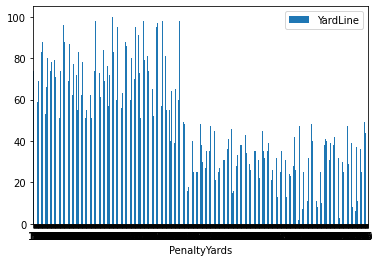

In [46]:
ax = p2.plot.bar(x='PenaltyYards', y='YardLine', rot=0)

In [47]:
p2['Penalty'].value_counts()

OFFENSIVE HOLDING                  202
FALSE START                        186
DEFENSIVE HOLDING                   93
DEFENSIVE PASS INTERFERENCE         76
DELAY OF GAME                       61
UNNECESSARY ROUGHNESS               53
DEFENSIVE OFFSIDE                   47
INELIGIBLE DOWNFIELD PASS           45
ILLEGAL CONTACT                     31
NEUTRAL ZONE INFRACTION             29
FACE MASK                           27
ILLEGAL FORMATION                   26
ILLEGAL USE OF HANDS                25
ROUGHING THE PASSER                 25
OFFENSIVE PASS INTERFERENCE         20
DEFENSIVE TOO MANY MEN ON FIELD     20
ILLEGAL BLOCK ABOVE THE WAIST       16
ILLEGAL SHIFT                       16
INTENTIONAL GROUNDING               15
ENCROACHMENT                         9
UNSPORTSMANLIKE CONDUCT              8
OFFENSIVE TOO MANY MEN ON FIELD      7
RUNNING INTO THE KICKER              6
TAUNTING                             4
LOW BLOCK                            4
HORSE COLLAR TACKLE      

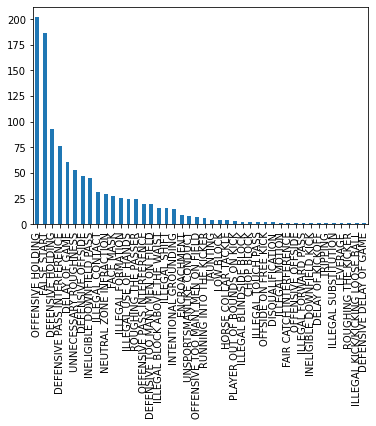

In [48]:
# Visualization 1 showing most commonly called NFL penalties this year
# Only necessary to use first dataset, but interesting to see one of the most subjective penatlies leads the way
p2['Penalty'].value_counts().plot(kind='bar');

In [49]:
p3

,Team,Net Yards Per Game
0,LA Rams,0.444444
1,Buffalo,12.444444
2,Atlanta,21.100000
3,New Orleans,-10.400000
4,Carolina,-2.400000
5,Cleveland,-6.777778
6,San Francisco,-3.666667
7,Chicago,-7.700000
8,Cincinnati,15.111111
9,Pittsburgh,0.666667


In [50]:
p4

,Team,W,L,Winning %,_links
0,Houston Texans,1,7,16.7,{'win-stats': {'href': 'http://nflteamstatsapi...
1,Las Vegas Raiders,2,7,22.2,{'win-stats': {'href': 'http://nflteamstatsapi...
2,Carolina Panthers,3,7,30.0,{'win-stats': {'href': 'http://nflteamstatsapi...
3,Chicago Bears,3,7,30.0,{'win-stats': {'href': 'http://nflteamstatsapi...
4,New Orleans Saints,3,7,30.0,{'win-stats': {'href': 'http://nflteamstatsapi...
5,Jacksonville Jaguars,3,7,30.0,{'win-stats': {'href': 'http://nflteamstatsapi...
6,Pittsburgh Steelers,3,6,33.300000000000004,{'win-stats': {'href': 'http://nflteamstatsapi...
7,Los Angeles Rams,3,6,33.300000000000004,{'win-stats': {'href': 'http://nflteamstatsapi...
8,Denver Broncos,3,6,33.300000000000004,{'win-stats': {'href': 'http://nflteamstatsapi...
9,Cleveland Browns,3,6,33.300000000000004,{'win-stats': {'href': 'http://nflteamstatsapi...


In [51]:
p3['Team'] = p3['Team'].replace(['LA Rams', 'Buffalo'], ['Los Angeles Rams', 'Buffalo Bills'])

In [52]:
p3

,Team,Net Yards Per Game
0,Los Angeles Rams,0.444444
1,Buffalo Bills,12.444444
2,Atlanta,21.100000
3,New Orleans,-10.400000
4,Carolina,-2.400000
5,Cleveland,-6.777778
6,San Francisco,-3.666667
7,Chicago,-7.700000
8,Cincinnati,15.111111
9,Pittsburgh,0.666667


In [53]:
p3['Team'] = p3['Team'].replace(['Atlanta', 'New Orleans'], ['Atlanta Falcons', 'New Orleans Saints'])

In [54]:
p3

,Team,Net Yards Per Game
0,Los Angeles Rams,0.444444
1,Buffalo Bills,12.444444
2,Atlanta Falcons,21.100000
3,New Orleans Saints,-10.400000
4,Carolina,-2.400000
5,Cleveland,-6.777778
6,San Francisco,-3.666667
7,Chicago,-7.700000
8,Cincinnati,15.111111
9,Pittsburgh,0.666667


In [55]:
p3['Team'] = p3['Team'].replace(['Carolina', 'Cleveland','San Francisco','Chicago','Cincinnati','Pittsburgh','Detroit','Philadelphia','Indianapolis','Houston','New England','Miami','N.Y. Jets','Baltimore','Washington','Jacksonville','Arizona','Kansas City','Las Vegas','LA Chargers','Minnesota','Green Bay','N.Y. Giants','Tennessee','Tampa Bay','Dallas','Seattle','Denver'], ['Carolina Panthers', 'Cleveland Browns','San Francisco 49ers','Chicago Bears','Cincinnati Bengals','Pittsburgh Steelers','Detroit Lions','Philadelphia Eagles','Indianapolis Colts','Houston Texans','New England Patriots','Miami Dolphins','New York Jets','Baltimore Ravens','Washington Commanders','Jacksonville Jaguars','Arizona Cardinals','Kansas City Chiefs','Las Vegas Raiders','Los Angeles Chargers','Minnesota Vikings','Green Bay Packers','New York Giants','Tennessee Titans','Tampa Bay Buccaneers','Dallas Cowboys','Seattle Seahawks','Denver Broncos'])

In [56]:
p3

,Team,Net Yards Per Game
0,Los Angeles Rams,0.444444
1,Buffalo Bills,12.444444
2,Atlanta Falcons,21.100000
3,New Orleans Saints,-10.400000
4,Carolina Panthers,-2.400000
5,Cleveland Browns,-6.777778
6,San Francisco 49ers,-3.666667
7,Chicago Bears,-7.700000
8,Cincinnati Bengals,15.111111
9,Pittsburgh Steelers,0.666667


In [63]:
# Inner join
nypg = pd.merge(p3, p4, on='Team', how='inner')

In [64]:
# Confirm new table
nypg

,Team,Net Yards Per Game,W,L,Winning %,_links
0,Los Angeles Rams,0.444444,3,6,33.300000000000004,{'win-stats': {'href': 'http://nflteamstatsapi...
1,Buffalo Bills,12.444444,6,3,66.7,{'win-stats': {'href': 'http://nflteamstatsapi...
2,Atlanta Falcons,21.100000,4,6,40.0,{'win-stats': {'href': 'http://nflteamstatsapi...
3,New Orleans Saints,-10.400000,3,7,30.0,{'win-stats': {'href': 'http://nflteamstatsapi...
4,Carolina Panthers,-2.400000,3,7,30.0,{'win-stats': {'href': 'http://nflteamstatsapi...
5,Cleveland Browns,-6.777778,3,6,33.300000000000004,{'win-stats': {'href': 'http://nflteamstatsapi...
6,San Francisco 49ers,-3.666667,5,4,55.60000000000001,{'win-stats': {'href': 'http://nflteamstatsapi...
7,Chicago Bears,-7.700000,3,7,30.0,{'win-stats': {'href': 'http://nflteamstatsapi...
8,Cincinnati Bengals,15.111111,5,4,55.60000000000001,{'win-stats': {'href': 'http://nflteamstatsapi...
9,Pittsburgh Steelers,0.666667,3,6,33.300000000000004,{'win-stats': {'href': 'http://nflteamstatsapi...


In [74]:
nypg["Winning %"] = pd.to_numeric(nypg["Winning %"])

<AxesSubplot:xlabel='Net Yards Per Game', ylabel='Winning %'>

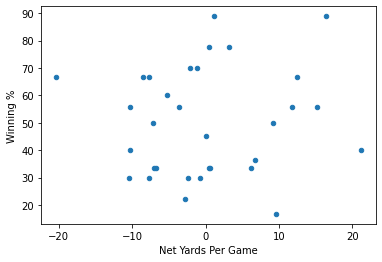

In [75]:
# Visualization 2 is to show if there was any correlation with winning % and the net yards per game from penalties
# This visualization has data from source two and source three
nypg.plot(x="Net Yards Per Game", y="Winning %", kind="scatter")

In [71]:
# Visualization 3 is to visualize correlation within the play by play data to see if there's anything from a high level look
# that sticks out. One thing to note is there is no correlation between two point conversions from a pass/run perspective
p2.corr().style.background_gradient(cmap="Blues")

C:\Users\jwiz3\anaconda\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\jwiz3\anaconda\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,GameId,Quarter,Minute,Second,Down,ToGo,YardLine,SeriesFirstDown,NextScore,TeamWin,RefereeName,Yards,IsRush,IsPass,IsIncomplete,IsTouchdown,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,YardLineFixed,IsPenaltyAccepted,IsNoPlay,PenaltyYards
GameId,1.000000,0.000428,0.042741,-0.041210,-0.035976,0.069530,0.050951,nan,nan,nan,nan,0.011900,0.043375,-0.017390,-0.025025,0.086452,-0.001796,-0.038298,nan,nan,-0.007879,0.057973,nan,0.012972,0.040964,-0.007229,0.029537,0.010351,0.027818
Quarter,0.000428,1.000000,0.044699,-0.024320,0.016479,0.039977,0.058773,nan,nan,nan,nan,-0.010530,-0.023457,0.032470,0.085430,0.018039,-0.008107,0.018135,nan,nan,-0.014184,-0.081998,nan,0.048232,0.038014,-0.041095,-0.038625,-0.027128,-0.024335
Minute,0.042741,0.044699,1.000000,-0.059481,-0.043233,0.033443,-0.059901,nan,nan,nan,nan,0.036901,0.074524,-0.006161,-0.012007,0.050065,-0.031627,0.070695,nan,nan,0.015189,-0.014631,nan,0.024575,0.038499,-0.047812,0.017957,-0.018278,-0.017582
Second,-0.041210,-0.024320,-0.059481,1.000000,-0.020288,-0.042960,0.017116,nan,nan,nan,nan,-0.050768,-0.017386,0.035581,0.075956,-0.003388,0.031756,-0.057164,nan,nan,-0.042500,-0.022781,nan,0.017838,0.004933,-0.002083,-0.006877,0.019470,0.048127
Down,-0.035976,0.016479,-0.043233,-0.020288,1.000000,-0.091949,0.004772,nan,nan,nan,nan,-0.072024,-0.171445,-0.039511,-0.015331,0.000051,0.016111,-0.018488,nan,nan,0.040945,-0.004409,nan,-0.140853,-0.057369,0.022542,-0.132413,-0.023081,-0.129112
ToGo,0.069530,0.039977,0.033443,-0.042960,-0.091949,1.000000,-0.222440,nan,nan,nan,nan,0.071195,0.016225,0.079389,0.031730,-0.039710,0.018612,-0.043986,nan,nan,0.064240,0.014829,nan,-0.146439,-0.059645,0.084023,-0.045016,0.024221,0.040003
YardLine,0.050951,0.058773,-0.059901,0.017116,0.004772,-0.222440,1.000000,nan,nan,nan,nan,-0.061590,-0.000950,-0.030760,0.007877,0.171922,-0.024206,0.006206,nan,nan,-0.061281,-0.079361,nan,0.138222,0.058924,-0.249631,0.009904,0.101543,-0.116653
SeriesFirstDown,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NextScore,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TeamWin,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


(array([1., 0., 4., 6., 7., 5., 2., 4., 2., 1.]),
 array([-20.33333333, -16.19      , -12.04666667,  -7.90333333,
         -3.76      ,   0.38333333,   4.52666667,   8.67      ,
         12.81333333,  16.95666667,  21.1       ]),
 <BarContainer object of 10 artists>)

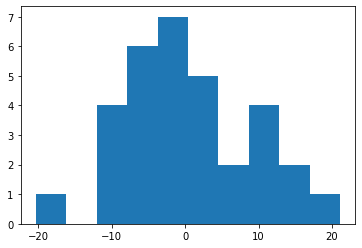

In [72]:
# Visualization 4 is to identify any outliers from NYPG, when we see -20 location of bar, this is a data point that shows the extreme end of the penalty yardage against a team
plt.hist(p3['Net Yards Per Game'])

<AxesSubplot:xlabel='Winning %', ylabel='Net Yards Per Game'>

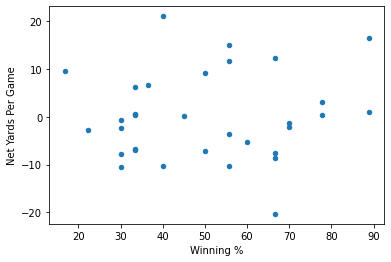

In [76]:
# Visualization 5 is to show if there was any correlation with winning % and the net yards per game from penalties
# This visualization has data from source two and source three
nypg.plot(x="Winning %", y="Net Yards Per Game", kind="scatter")